# **TRAVELING SALESMAN PROBLEM USING OR-TOOLS**



This project presents an example that shows how to solve the Traveling Salesman Problem (TSP) using OR tools for given any 23 locations to keep it easy.


Resources:
* https://developers.google.com/optimization/routing/tsp


<image src="https://media3.giphy.com/media/WSBcKq3IMknO1ichgo/giphy.gif" height="300">

In this notebook, you will learn how to:
1. Formulate the Traveling Salesman Problem(TSP) in service solver
2. Use heuristics to identify solutions of the TSP problem that are infeasible


# Problem Statement

The TSP can be defined as follows: for a given list of cities and the distances between each pair of them, we want to find the shortest possible route that goes to each city once and returns to the origin city.

There is a class of Traveling Salesman Problems that assumes that the distance of going from city i
to city j is the same as going form city j to city i, this type of Traveling Salesman Problem is also known as the symmetric Traveling Salesman Problem. In this example, we use Manhattan distances, but the TSP model formulation is valid independent of the way in which the individual distances are determined.
OR tools accepts Manhattan distances in determining more accurate optimal solutions.

**Problem Scenario:**
A salesman was assigned an assignment to travel to 23 locations of Fairfield County in Connecticut in the state of Connecticut. He reached his manager due to budget cut.He had to finish the travel plan in less cost possible.His manager used these heuristics available in Google OR-tools to determine the optimal route to decrease travel cost and save money for the travel with the help of Connecticut Data.We assume the cost of travel is same as the distance covered by the Salesperson who travels at constant speed.

A heuristic technique, or a heuristic, is any approach to problem solving or self-discovery that employs a practical method that is not guaranteed to be optimal, perfect, or rational, but is nevertheless sufficient for reaching an immediate, short-term goal or approximation. 
Source: https://en.wikipedia.org/wiki/Heuristic

# Traveling Salesman Problem

In [ ]:
# In this notebook, I will want to check the amount of time spent in the execution of each cell, so I need to install an additional package
!pip install ipython-autotime
%load_ext autotime

time: 161 µs (started: 2021-04-19 15:04:15 +00:00)


In [ ]:
import time
start = time.time() #start time noted

time: 1.73 ms (started: 2021-04-19 15:04:15 +00:00)


## Data Preparation 

### Mount the Google Drive

In [ ]:
# from google.colab import drive, files 
# drive.mount('/content/drive/', force_remount=True)  #mounting drive

time: 1.18 ms (started: 2021-04-19 15:04:15 +00:00)


### Install required packages





In [ ]:
#import pandas and numpy for operations
import pandas as pd  #dataframes
import numpy as np #arrays 

time: 1.45 ms (started: 2021-04-19 15:04:15 +00:00)


In [ ]:
#import packages to calculate location distances 
from sklearn.metrics.pairwise import manhattan_distances #manhattan distances
from math import radians

time: 862 ms (started: 2021-04-19 15:04:15 +00:00)


In [ ]:
#import packages to plot maps and plots
import matplotlib.pyplot as plt
import seaborn as sns
#plotly packages
import plotly.express as px 
import plotly.graph_objects as go
import networkx as nx 
from pylab import * 

time: 1.77 s (started: 2021-04-19 15:04:16 +00:00)


### Data wrangling

In [ ]:
#Reading data for Town Centroids
# https://drive.google.com/file/d/1PCuDeuLFA__tM3jfjTZZSy4G3FKpuRc6/view?usp=sharing
!gdown --id 1PCuDeuLFA__tM3jfjTZZSy4G3FKpuRc6
data = pd.read_csv('townCents.csv')

# X-longitude,Y-latitude 
geogTable = data[['X', 'Y']]

#check location data
data 

Downloading...
From: https://drive.google.com/uc?id=1PCuDeuLFA__tM3jfjTZZSy4G3FKpuRc6
To: /content/townCents.csv
100% 20.1k/20.1k [00:00<00:00, 7.38MB/s]


,X,Y,TOWN_NO,TOWN,TOTAL_SQMI,LAND_SQMI,WATER_SQMI,COUNTY,PLAN_ORG,DEP_DIST,COAST_AREA
0,-73.425651,41.986019,122,Salisbury,60.5,57.6,2.9,Litchfield,Northwestern Conn,DEP Western District,NaN
1,-73.293569,42.022264,100,North Canaan,19.6,19.6,0.0,Litchfield,Northwestern Conn,DEP Western District,NaN
2,-73.196224,41.980145,98,Norfolk,46.7,45.6,1.1,Litchfield,Litchfield Hills,DEP Western District,NaN
3,-73.080811,42.001546,29,Colebrook,33.0,32.8,0.2,Litchfield,Litchfield Hills,DEP Western District,NaN
4,-72.948897,42.004293,65,Hartland,34.5,33.0,1.5,Hartford,Litchfield Hills,DEP Western District,NaN
...,...,...,...,...,...,...,...,...,...,...,...
164,-73.346495,41.145319,158,Westport,22.4,19.9,2.5,Fairfield,Southwestern Conn,DEP Western District,OLISP Coastal Area
165,-73.559037,41.105028,135,Stamford,38.5,37.3,1.2,Fairfield,Southwestern Conn,DEP Western District,OLISP Coastal Area
166,-73.422614,41.118148,103,Norwalk,27.7,23.0,4.7,Fairfield,Southwestern Conn,DEP Western District,OLISP Coastal Area
167,-73.638467,41.069082,57,Greenwich,50.6,47.3,3.3,Fairfield,Southwestern Conn,DEP Western District,OLISP Coastal Area


time: 1.49 s (started: 2021-04-19 15:04:17 +00:00)


In [ ]:
data['COUNTY'].unique() # all counties available

array(['Litchfield', 'Hartford', 'Tolland', 'Windham', 'New London',
       'Fairfield', 'Middlesex', 'New Haven'], dtype=object)

time: 4.72 ms (started: 2021-04-19 15:04:19 +00:00)


In [ ]:
#Simplify to only 23 towns...
# df=data[data['COUNTY']=='Fairfield'] # get all the 23 towns in Fairfield County 
df = data
df.shape #check shape to verify df

(169, 11)

time: 4.17 ms (started: 2021-04-19 15:04:19 +00:00)


In [ ]:
df.reset_index(inplace=True) #reset index

time: 3.03 ms (started: 2021-04-19 15:04:19 +00:00)


In [ ]:
#plotting the towns on an interactive map
fig = px.scatter_mapbox(df, lat="Y", lon="X", color="TOWN",zoom=8.25) #easy format to draw maps on plotly
fig.update_layout(mapbox_style="carto-darkmatter",title="TOWN MAP")
config = dict({'scrollZoom': False}) #stopped zoom config for standard view capture
fig.show(config=config)

time: 2.52 s (started: 2021-04-19 15:04:19 +00:00)


In [ ]:
# X-longitude,Y-latitude 
geogTable = df[['TOWN','X', 'Y']] 
geogTable #verify geogTable

,TOWN,X,Y
0,Salisbury,-73.425651,41.986019
1,North Canaan,-73.293569,42.022264
2,Norfolk,-73.196224,41.980145
3,Colebrook,-73.080811,42.001546
4,Hartland,-72.948897,42.004293
...,...,...,...
164,Westport,-73.346495,41.145319
165,Stamford,-73.559037,41.105028
166,Norwalk,-73.422614,41.118148
167,Greenwich,-73.638467,41.069082


time: 41.3 ms (started: 2021-04-19 15:04:21 +00:00)


In [ ]:
#Make a back-up of the original XY data...
geogTable_orig = geogTable

time: 1.22 ms (started: 2021-04-19 15:04:21 +00:00)


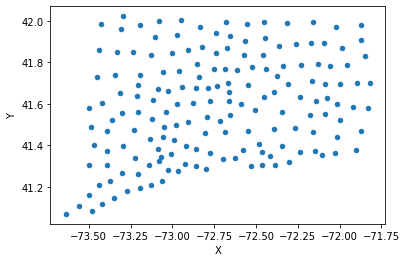

time: 213 ms (started: 2021-04-19 15:04:21 +00:00)


In [ ]:
#2D map of the cities...
geogTable.plot.scatter(x='X', y='Y') #x=long,Y=lat here
plt.show()

Check your work!

## **USING OR TOOLS:**

OR-Tools is open source software for combinatorial optimization, which seeks to find the best solution to a problem out of a very large set of possible solutions. 

##### Install OR TOOLS package

In [ ]:
!pip install ortools

     |████████████████████████████████| 14.2MB 281kB/s 
     |████████████████████████████████| 1.0MB 42.4MB/s 
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


time: 10.7 s (started: 2021-04-19 15:04:22 +00:00)


 Traveling Salesman Problem is a model of simple Vehicle Routing Problem with one Vehicle and no Depot 

In [ ]:
from sklearn.metrics.pairwise import manhattan_distances
# got the same result!
# you can just call this df and reference it below for data
geogDist1=np.round(manhattan_distances(geogTable[['X', 'Y']])* 6371000/1000)  # multiply by Earth radius to get kilometers
#we rounded the value to compare the resullt with other solvers

time: 7.8 ms (started: 2021-04-19 15:04:32 +00:00)



####Import Google OR tools solver packages

In [ ]:
# [START import]

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

# [END import]

time: 237 ms (started: 2021-04-19 15:04:32 +00:00)


#### Create Distance matrix 

In [ ]:
# [START data_model]

def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = geogDist1 #cost matrix
    data['num_vehicles'] = 1 #one vehicle
    data['depot'] = 0 #no depot
    return data

# [END data_model]

time: 5.04 ms (started: 2021-04-19 15:04:33 +00:00)


#### Solution print function

In [ ]:
# [START solution_printer]

def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: {} km'.format(solution.ObjectiveValue())) #printing objective function
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    tsp=[] #solution matrix
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        tsp.append(manager.IndexToNode(index)) #adding solution
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}km\n'.format(route_distance)
    return tsp

# [END solution_printer]

time: 14.7 ms (started: 2021-04-19 15:04:33 +00:00)


####Create a model

In [ ]:
# Instantiate the data problem.
# [START data]

data = create_data_model() # create model

# [END data]

time: 1.95 ms (started: 2021-04-19 15:04:33 +00:00)


#### Create the Routing Index Manager and Routing Model.

In [ ]:
# Create the routing index manager.
# [START index_manager]

manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                       data['num_vehicles'], data['depot'])

# [END index_manager]

# Create Routing Model.
# [START routing_model]

routing = pywrapcp.RoutingModel(manager)

# [END routing_model]

time: 7.07 ms (started: 2021-04-19 15:04:33 +00:00)


####Link nodes with distance and a callback

In [ ]:
# [START transit_callback]

def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix Node Index.
    from_node = manager.IndexToNode(from_index) #link nodes with distance
    to_node = manager.IndexToNode(to_index)     #new distance matrix that OR tools understand
    return data['distance_matrix'][from_node][to_node]

#set a callback to the distance or cost function
transit_callback_index = routing.RegisterTransitCallback(distance_callback) 
# [END transit_callback]

time: 5.68 ms (started: 2021-04-19 15:04:33 +00:00)


#### Define cost of each arc.

In [ ]:
# Define cost of each arc.
# [START arc_cost]

routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index) #use that callback to configure the objective heuristic(cost)

# [END arc_cost]

time: 2.24 ms (started: 2021-04-19 15:04:33 +00:00)


#### Setting first solution heuristic

######FirstSolutionStrategy options

https://developers.google.com/optimization/routing/routing_options#first_sol_options

In [ ]:
# search_parameters = pywrapcp.DefaultRoutingSearchParameters() #setting default parameters for TSP   #more options in VRP 
# search_parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.AUTOMATIC) # set it to AUTOMATIC mode for strategy 

time: 1.61 ms (started: 2021-04-19 15:04:33 +00:00)


Option | 	Description
-|-
AUTOMATIC |	Lets the solver detect which strategy to use according to the model being solved.
PATH_CHEAPEST_ARC |	Starting from a route "start" node, connect it to the node which produces the cheapest route segment, then extend the route by iterating on the last node added to the route.
PATH_MOST_CONSTRAINED_ARC |	Similar to PATH_CHEAPEST_ARC, but arcs are evaluated with a comparison-based selector which will favor the most constrained arc first. To assign a selector to the routing model, use the method ArcIsMoreConstrainedThanArc().
EVALUATOR_STRATEGY |	Similar to PATH_CHEAPEST_ARC, except that arc costs are evaluated using the function passed to SetFirstSolutionEvaluator().
SAVINGS | 	Savings algorithm (Clarke & Wright). Reference: Clarke, G. & Wright, J.W.: "Scheduling of Vehicles from a Central Depot to a Number of Delivery Points", Operations Research, Vol. 12, 1964, pp. 568-581.
SWEEP |	Sweep algorithm (Wren & Holliday). Reference: Anthony Wren & Alan Holliday: Computer Scheduling of Vehicles from One or More Depots to a Number of Delivery Points Operational Research Quarterly (1970-1977), Vol. 23, No. 3 (Sep., 1972), pp. 333-344.
CHRISTOFIDES | 	Christofides algorithm (actually a variant of the Christofides algorithm using a maximal matching instead of a maximum matching, which does not guarantee the 3/2 factor of the approximation on a metric travelling salesman). Works on generic vehicle routing models by extending a route until no nodes can be inserted on it. Reference: Nicos Christofides, Worst-case analysis of a new heuristic for the travelling salesman problem, Report 388, Graduate School of Industrial Administration, CMU, 1976.
ALL_UNPERFORMED |	Make all nodes inactive. Only finds a solution if nodes are optional (are element of a disjunction constraint with a finite penalty cost).
BEST_INSERTION |	Iteratively build a solution by inserting the cheapest node at its cheapest position; the cost of insertion is based on the global cost function of the routing model. As of 2/2012, only works on models with optional nodes (with finite penalty costs).
PARALLEL_CHEAPEST_INSERTION |	Iteratively build a solution by inserting the cheapest node at its cheapest position; the cost of insertion is based on the arc cost function. Is faster than BEST_INSERTION.
LOCAL_CHEAPEST_INSERTION |	Iteratively build a solution by inserting each node at its cheapest position; the cost of insertion is based on the arc cost function. Differs from PARALLEL_CHEAPEST_INSERTION  by the node selected for insertion; here nodes are considered in their order of creation. Is faster than PARALLEL_CHEAPEST_INSERTION.
GLOBAL_CHEAPEST_ARC |	Iteratively connect two nodes which produce the cheapest route segment.
LOCAL_CHEAPEST_ARC |	Select the first node with an unbound successor and connect it to the node which produces the cheapest route segment.
FIRST_UNBOUND_MIN_VALUE |	Select the first node with an unbound successor and connect it to the first available node. This is equivalent to the CHOOSE_FIRST_UNBOUND strategy combined with ASSIGN_MIN_VALUE (cf. constraint_solver.h).

######Local search options 

https://developers.google.com/optimization/routing/routing_options#local_search_options

In [ ]:
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.AUTOMATIC)
search_parameters.time_limit.seconds = 30
search_parameters.log_search = True

time: 9.67 ms (started: 2021-04-19 15:04:33 +00:00)


Option |	Description
-|-
AUTOMATIC |	Lets the solver select the metaheuristic.
GREEDY_DESCENT |	Accepts improving (cost-reducing) local search neighbors until a local minimum is reached.
GUIDED_LOCAL_SEARCH  |	Uses guided local search to escape local minima (cf. http://en.wikipedia.org/wiki/Guided_Local_Search); this is generally the most efficient metaheuristic for vehicle routing.
SIMULATED_ANNEALING  |	Uses simulated annealing to escape local minima (cf. http://en.wikipedia.org/wiki/Simulated_annealing).
TABU_SEARCH |	Uses tabu search to escape local minima (cf. http://en.wikipedia.org/wiki/Tabu_search).
OBJECTIVE_TABU_SEARCH  |	Uses tabu search on the objective value of solution to escape local minima

In [ ]:
# [START parameters]

search_parameters = pywrapcp.DefaultRoutingSearchParameters() #setting default parameters for TSP   #more options in VRP 
search_parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.AUTOMATIC) # set it to AUTOMATIC mode for strategy 
    
#more strategies:https://developers.google.com/optimization/routing/routing_options#local_search_options

# [END parameters]


time: 3.88 ms (started: 2021-04-19 15:04:33 +00:00)


#### Solve the problem.

In [ ]:
# [START solve]

# Solve the problem.
solution = routing.SolveWithParameters(search_parameters) #solve with those parameters

# [END solve]


time: 1.14 s (started: 2021-04-19 15:04:33 +00:00)


#### Print solution 

In [ ]:
# [START print_solution]

#use the print function generated before to print the solution & add to tsp array
if solution:
    tsp=print_solution(manager, routing, solution) 

# [END print_solution]

Objective: 114768 km
Route for vehicle 0:
 0 -> 26 -> 29 -> 53 -> 52 -> 76 -> 79 -> 106 -> 121 -> 141 -> 160 -> 163 -> 165 -> 167 -> 168 -> 166 -> 164 -> 161 -> 162 -> 159 -> 157 -> 154 -> 155 -> 148 -> 122 -> 128 -> 144 -> 153 -> 133 -> 130 -> 126 -> 124 -> 129 -> 136 -> 149 -> 151 -> 150 -> 140 -> 125 -> 143 -> 123 -> 132 -> 139 -> 135 -> 127 -> 108 -> 87 -> 85 -> 54 -> 56 -> 58 -> 84 -> 99 -> 117 -> 109 -> 97 -> 94 -> 81 -> 80 -> 69 -> 62 -> 59 -> 60 -> 41 -> 42 -> 32 -> 23 -> 12 -> 11 -> 30 -> 17 -> 10 -> 9 -> 24 -> 19 -> 18 -> 40 -> 39 -> 38 -> 57 -> 63 -> 91 -> 104 -> 105 -> 110 -> 86 -> 74 -> 61 -> 89 -> 90 -> 96 -> 103 -> 115 -> 113 -> 98 -> 83 -> 82 -> 102 -> 107 -> 119 -> 137 -> 145 -> 146 -> 134 -> 120 -> 111 -> 92 -> 88 -> 77 -> 100 -> 116 -> 114 -> 118 -> 138 -> 142 -> 156 -> 152 -> 158 -> 147 -> 131 -> 112 -> 101 -> 71 -> 95 -> 93 -> 78 -> 67 -> 51 -> 50 -> 72 -> 70 -> 66 -> 45 -> 43 -> 55 -> 73 -> 68 -> 65 -> 75 -> 64 -> 46 -> 48 -> 49 -> 37 -> 44 -> 47 -> 36 -> 20 -> 8 

In [ ]:
tsp=np.array(tsp) 
tsp #solution array

array([  0,  26,  29,  53,  52,  76,  79, 106, 121, 141, 160, 163, 165,
       167, 168, 166, 164, 161, 162, 159, 157, 154, 155, 148, 122, 128,
       144, 153, 133, 130, 126, 124, 129, 136, 149, 151, 150, 140, 125,
       143, 123, 132, 139, 135, 127, 108,  87,  85,  54,  56,  58,  84,
        99, 117, 109,  97,  94,  81,  80,  69,  62,  59,  60,  41,  42,
        32,  23,  12,  11,  30,  17,  10,   9,  24,  19,  18,  40,  39,
        38,  57,  63,  91, 104, 105, 110,  86,  74,  61,  89,  90,  96,
       103, 115, 113,  98,  83,  82, 102, 107, 119, 137, 145, 146, 134,
       120, 111,  92,  88,  77, 100, 116, 114, 118, 138, 142, 156, 152,
       158, 147, 131, 112, 101,  71,  95,  93,  78,  67,  51,  50,  72,
        70,  66,  45,  43,  55,  73,  68,  65,  75,  64,  46,  48,  49,
        37,  44,  47,  36,  20,   8,   7,  22,  21,   6,  25,  33,  14,
         5,  28,  27,  34,  15,   4,   3,  16,  35,  31,   2,   1,  13])

time: 5.14 ms (started: 2021-04-19 15:04:34 +00:00)


In [ ]:
# now reindex the original data
geogTable_orig2 = geogTable_orig.reindex(tsp)
#geogTable_orig2.loc[23,:]=geogTable_orig2.iloc[0,:]
geogTable_orig2=geogTable_orig2.append(geogTable_orig2.iloc[0,:]) # please notice this change
geogTable_orig2

,TOWN,X,Y
0,Salisbury,-73.425651,41.986019
26,Sharon,-73.437617,41.857504
29,Cornwall,-73.329834,41.847490
53,Warren,-73.344878,41.740547
52,Kent,-73.453978,41.729900
...,...,...,...
31,Goshen,-73.233558,41.850099
2,Norfolk,-73.196224,41.980145
1,North Canaan,-73.293569,42.022264
13,Canaan,-73.310044,41.959882


time: 44.4 ms (started: 2021-04-19 15:04:34 +00:00)


### Visualize the solution

In [ ]:
mean(geogTable_orig2['X']) #for center of Map-mean longitude

-72.74591006587731

time: 4.8 ms (started: 2021-04-19 15:04:34 +00:00)


In [ ]:
mean(geogTable_orig2['Y']) #for center of Map-mean latitude

41.59532503780617

time: 4.54 ms (started: 2021-04-19 15:04:34 +00:00)


In [ ]:
fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig2['X'],
    lat = geogTable_orig2['Y'],
    name="Main Route",
    hovertext=geogTable_orig2['TOWN'],
    marker = {'size': 10}))

for i in range(len(geogTable_orig2)):
  fig.add_trace(go.Scattermapbox(
    mode = "markers+lines",
    lon = [geogTable_orig2.iloc[i,1],geogTable_orig2.iloc[i-1,1]],
    lat = [geogTable_orig2.iloc[i,2],geogTable_orig2.iloc[i-1,2]],
    name="Route"+str(i),
    text=[geogTable_orig2.iloc[i,0]+'-'+str(i),geogTable_orig2.iloc[i-1,0]+'-'+str(i-1)],
    textposition='top center',
    marker = {'size': 10}))
  
fig.update_layout(mapbox_style="carto-darkmatter", mapbox_zoom=6.25, mapbox_center_lat = 41.26878471063158,mapbox_center_lon = -73.37656607409332,
    margin={"r":0,"t":0,"l":0,"b":0},title="TRAVELING SALESMAN ROUTE")
config = dict({'scrollZoom': False})
fig.show(config=config)


time: 2.25 s (started: 2021-04-19 15:04:52 +00:00)


**We notice OR tools has generated an optimal solution which travels in clockwise direction.**

#### Animated Visualisation

In [ ]:
fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig2['X'], #longitude
    lat = geogTable_orig2['Y'], #latitude
    name="Traveling Salesman", 
    hovertext=geogTable_orig2['TOWN'], #town name
    marker = {'size': 10}),
    layout=go.Layout(
        hovermode="closest",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
        frames=[go.Frame(
        data=[go.Scattermapbox(
            lon=[geogTable_orig2.iloc[k,1]],
            lat=[geogTable_orig2.iloc[k,2]],
            mode="markers",
            marker=dict(color="red", size=10))])

        for k in range(len(geogTable_orig2))]
)
fig.add_trace(go.Scattermapbox(
    mode = "markers+lines",
    lon = geogTable_orig2['X'], #longitude
    lat = geogTable_orig2['Y'], #latitude
    name="Main Route", 
    hovertext=geogTable_orig2['TOWN'], #town name
    marker=dict(color="blue", size=5)))

  
fig.update_layout(mapbox_style="carto-darkmatter", mapbox_zoom=8.25, mapbox_center_lat = 41.26878471063158,mapbox_center_lon = -73.37656607409332,
    margin={"r":0,"t":0,"l":0,"b":0},title="TRAVELING SALESMAN ROUTE")
config = dict({'scrollZoom': False})
fig.show(config=config)

time: 11.7 s (started: 2021-04-19 15:04:35 +00:00)


In [ ]:
print('Minimum distance: {} km'.format(solution.ObjectiveValue())) #Minimum distance covered (or) Minimum Cost= 17139 km

Minimum distance: 114768 km
time: 2.12 ms (started: 2021-04-19 15:04:47 +00:00)


# End time

In [ ]:
end = time.time() #End time noted
print(end - start," s")

32.3384108543396  s
time: 2.41 ms (started: 2021-04-19 15:04:47 +00:00)


# Conclusion

In this modeling example, we have shown how to formulate the symmetric Traveling Salesman Problem. We also showed how to dynamically use heuristics in service solvers and use TSP.